In [1]:
%load_ext autoreload
%autoreload 2

## Basic imports

In [2]:
# !pip install numpy
# !pip install matplotlib
# !pip install torch
# !pip install torchaudio
# !pip install torchvision

In [4]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torchaudio
import torch

from torch.utils.data import DataLoader, random_split
import torch.nn as nn


### Import custom modules

In [6]:
from spectrogram import get_spectrogram, save_spectrogram_as_image
from training_utils import SpeechDataLoader, train_model
from model import SpectrogramModel

## Visualise data

In [7]:
audio_files = glob('data/*/*.wav')
len(audio_files), audio_files[0]

(609, 'data/id10003/16.wav')

### Plot single sound wave

torch.Size([1, 80000]) 16000


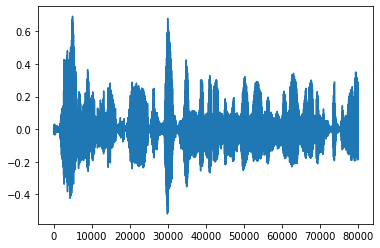

In [8]:
audio_file = audio_files[0]
data_waveform, rate_of_sample = torchaudio.load(audio_file)
print(data_waveform.shape, rate_of_sample)

plt.figure()
plt.plot(data_waveform.t().numpy())
plt.show()

### Plot spectrogram

torch.Size([1, 160, 160])


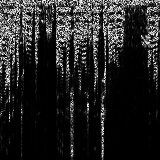

In [9]:
audio_file_name = audio_files[221]
spectrogram = get_spectrogram(audio_file_name)
print(spectrogram.shape)
img = save_spectrogram_as_image(spectrogram)
img

## Preprocess data

### Read all sound files

In [11]:
%%time
spectograms = list()
labels = list()

for audio_file in audio_files:
    spectrogram = get_spectrogram(audio_file)
    sp = spectrogram[None, :]
    spectograms.append(sp)
    labels.append(audio_file.split('/')[-2])

# concatenate all spectrograms to single tensor
matrix = torch.cat(spectograms, dim=0)
print(matrix.shape)

torch.Size([609, 1, 160, 160])


### Create labels

In [12]:
i = 0
d = dict()
for e in set(labels):
    d[e] = i
    
labels_tensor = [d[x] for x in labels]
labels_tensor = torch.tensor(labels_tensor)

num_speakers = len(set(labels))
print('Number of labels: {}'.format(labels_tensor.shape[0]))
print('Number of distinct speakers: {}'.format(num_speakers))


Number of labels: 609
Number of distinct speakers: 4


## Train model

### Split train/valid/test data

In [13]:
dataset = SpeechDataLoader(matrix, labels_tensor)

num_samples = len(dataset)
training_rate = 0.7
batch_size = 16

print('Numer of training samples: {}'.format(num_samples))


traindata, validdata = random_split(dataset, [round(num_samples * training_rate), 
                                              round(num_samples * (1-training_rate))])

trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True)
validloader = DataLoader(validdata, batch_size=batch_size, shuffle=True)

Numer of training samples: 609


### Initialise model training parameters

In [14]:
net = SpectrogramModel(num_class=num_speakers)

num_epochs = 10
device = torch.device('cuda:9' if torch.cuda.is_available() else 'cpu')


net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

### Run training

In [15]:
for epoch in range(0, num_epochs):
    train_model(net, trainloader, validloader, optimizer, criterion, epoch, device)

Epoch: [1]  Training Loss: [0.372] Train Accuracy [96.948] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [2]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [3]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [4]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [5]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [6]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [7]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [8]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [9]  Training Loss: [0.000] Train Accuracy [100.000] Valid Loss [0.000] Valid Accuracy [100.000]
Epoch: [10]  Training Loss: [0.000] Train Accuracy [100.000] Vali